This notebook allows the reproduce **Figure 5** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Tom Ruttink and Bernard De Baets.


#### Load packages

In [1]:
using Random 
using Plots  
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP


(process:45680): GLib-GIO-WARNING **: 13:39:39.730: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


#### Load BioCCP- and simulation-based framework

In [2]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [3]:
Random.seed!(1)

TaskLocalRNG()

#### Study relation between expected plant library size for full coverage of all pairwise combination of gene knockouts and experimental design parameters

In [4]:
include("DefaultParameters_k=2.jl");

- Figure 5A: Influence of number of target genes on the plant library size for full combinatorial coverage

In [5]:
### default: 20 target genes
E_20_sim, sd_20_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_20_bioccp, sd_20_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 10 target genes
x = 10
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_10_sim, sd_10_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_10_bioccp, sd_10_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)


### 30 target genes
x = 30
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_30_sim, sd_30_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_30_bioccp, sd_30_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 40 target genes
x = 40
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_40_sim, sd_40_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_40_bioccp, sd_40_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 50 target genes
x = 50
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_50_sim, sd_50_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_50_bioccp, sd_50_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

(26977, 5874)

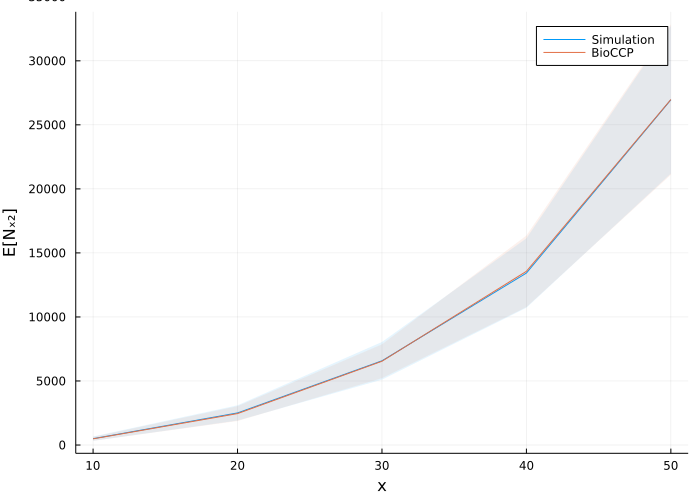

In [6]:
E_targets_sim = [E_10_sim, E_20_sim, E_30_sim, E_40_sim, E_50_sim]
E_targets_bioccp = [E_10_bioccp, E_20_bioccp, E_30_bioccp, E_40_bioccp, E_50_bioccp]
sd_targets_sim = [sd_10_sim, sd_20_sim, sd_30_sim, sd_40_sim, sd_50_sim]
sd_targets_bioccp = [sd_10_bioccp, sd_20_bioccp, sd_30_bioccp, sd_40_bioccp, sd_50_bioccp];

plot(collect(10:10:50), E_targets_sim, label="Simulation", 
    title="", xlabel="x", ylabel="E[Nₓ₂]",
    ribbon = sd_targets_sim, fillalpha=.1,
    xticks = (10:10:50, string.(10:10:50)),
    yticks = (0:5000:50000, string.(0:5000:50000)),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!(collect(10:10:50), E_targets_bioccp,  label="BioCCP",
    ribbon = sd_targets_bioccp, 
    fillalpha=.1,
)

- Figure 5B: Influence of global knockout efficiency on the plant library size for full combinatorial coverage

In [19]:
include("DefaultParameters_k=2.jl"); # reset to default values

In [20]:
## global knockout efficiency of 0.3
ϵ_KO = 0.3

E_p_KO30_bioccp, sd_p_KO30_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO30_sim, sd_p_KO30_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)


## global knockout efficiency of 0.7
ϵ_KO = 0.4

E_p_KO40_bioccp, sd_p_KO40_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO40_sim, sd_p_KO40_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.7
ϵ_KO = 0.5

E_p_KO50_bioccp, sd_p_KO50_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO50_sim, sd_p_KO50_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.7
ϵ_KO = 0.6

E_p_KO60_bioccp, sd_p_KO60_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO60_sim, sd_p_KO60_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.7
ϵ_KO = 0.7

E_p_KO70_bioccp, sd_p_KO70_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO70_sim, sd_p_KO70_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.8
ϵ_KO = 0.8

E_p_KO80_bioccp, sd_p_KO80_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO80_sim, sd_p_KO80_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.9
ϵ_KO = 0.9

E_p_KO90_bioccp, sd_p_KO90_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO90_sim, sd_p_KO90_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 1
ϵ_KO = 1

E_p_KO100_bioccp, sd_p_KO100_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO100_sim, sd_p_KO100_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

(1583.538, 383.0005736743351)

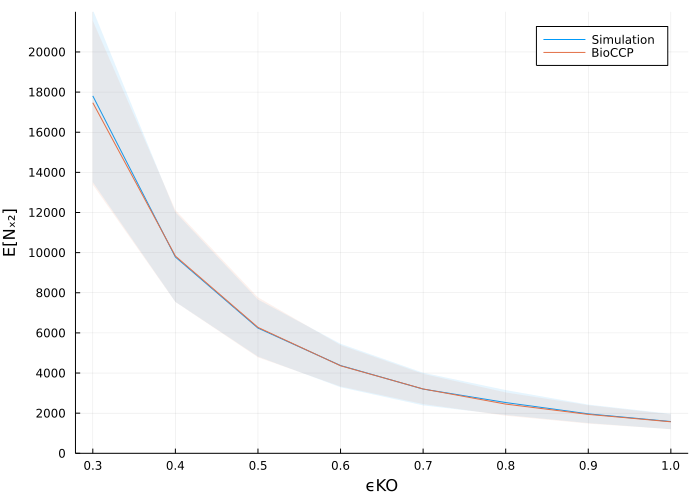

In [27]:
E_p_KO_sim = [E_p_KO30_sim, E_p_KO40_sim, E_p_KO50_sim, E_p_KO60_sim, E_p_KO70_sim, E_p_KO80_sim, E_p_KO90_sim,E_p_KO100_sim]
E_p_KO_bioccp = [E_p_KO30_bioccp, E_p_KO40_bioccp, E_p_KO50_bioccp, E_p_KO60_bioccp, E_p_KO70_bioccp, E_p_KO80_bioccp, E_p_KO90_bioccp, E_p_KO100_bioccp]
sd_p_KO_sim = [sd_p_KO30_sim, sd_p_KO40_sim, sd_p_KO50_sim, sd_p_KO60_sim, sd_p_KO70_sim, sd_p_KO80_sim, sd_p_KO90_sim,sd_p_KO100_sim]
sd_p_KO_bioccp = [sd_p_KO30_bioccp, sd_p_KO40_bioccp, sd_p_KO50_bioccp, sd_p_KO60_bioccp, sd_p_KO70_bioccp, sd_p_KO80_bioccp, sd_p_KO90_bioccp, sd_p_KO100_bioccp];

plot(0.3:0.1:1, E_p_KO_sim, label="Simulation", 
    title="", xlabel="ϵKO", ylabel="E[Nₓ₂]",
    ribbon = sd_p_KO_sim, fillalpha=.1,
    xticks = (0.3:0.1:1, string.(0.3:0.1:1)),
    yticks = (0:2000:20000, string.(0:2000:20000)),
    ylim=(0,22000),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!(0.3:0.1:1, E_p_KO_bioccp,  label="BioCCP",
    ribbon = sd_p_KO_bioccp, 
    fillalpha=.1,
)

- Figure 5C: Influence of gRNA frequency distribution on plant library size for full combinatorial coverage (vary parameter ρ)

In [16]:
include("DefaultParameters_k=2.jl"); # reset to default values

In [17]:
iter = 15 # generate different gRNA frequency distributions for specific ρ

## default: ρ = 2
Random.seed!(1)
Es_p2_bioccp = zeros(iter, 6)
sds_p2_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
    n_gRNA_total = x*g
    ρ  = 2; l = 50; u = 50*ρ 
    m = (l + u)/2
    sd = (u - l)/2
    p_gRNA_freq_2 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
    p_gRNA_edit = ones(n_gRNA_total)
    E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_2, 
                              p_gRNA_edit, ϵ_KO)
    Es_p2_bioccp[i,g] = E
    sds_p2_bioccp[i,g] = sd
    end
end


## ρ = 1
Random.seed!(1)
Es_p1_bioccp = zeros(iter, 6)
sds_p1_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
        n_gRNA_total = x*g
        p_gRNA_freq_1 = ones(n_gRNA_total)/n_gRNA_total
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_1, 
                              p_gRNA_edit, ϵ_KO)
        Es_p1_bioccp[i,g] = E
        sds_p1_bioccp[i,g] = sd
    end
end

## ρ = 4
Random.seed!(1)
Es_p4_bioccp = zeros(iter, 6)
sds_p4_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        ρ = 4; l = 50; u = 50 * ρ
        m = (l + u)/2
        sd = (u - l)/2
        p_gRNA_freq_4 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_4, 
                              p_gRNA_edit, ϵ_KO)
        Es_p4_bioccp[i,g] = E
        sds_p4_bioccp[i,g] = sd
    end
end

## ρ = 8
Random.seed!(1)
Es_p8_bioccp = zeros(iter, 6)
sds_p8_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        ρ  = 8; l = 50; u = 50 * ρ 
        m = (l + u)/2
        sd = (u - l)/2
        p_gRNA_freq_8 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_8, 
                              p_gRNA_edit, ϵ_KO)
        Es_p8_bioccp[i,g] = E
        sds_p8_bioccp[i,g] = sd
    end
end

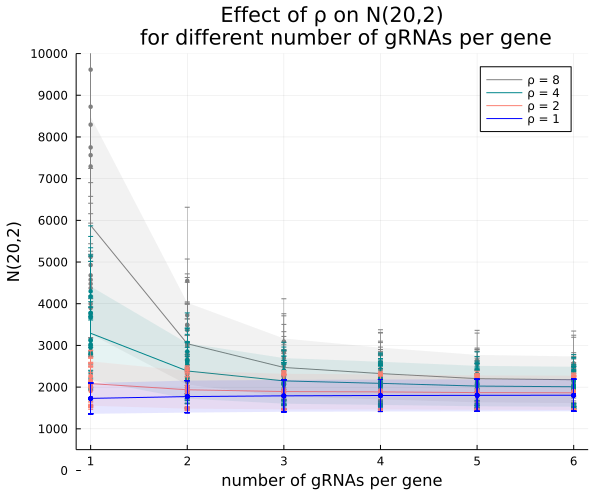

In [18]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_p8_bioccp', errorbar=sds_p8_bioccp', color=:grey, label="",markersize=markersize, 
    markerstrokewidth=markerstrokewidth, markerstrokecolor=:grey)
plot!(1:6, mean(Es_p8_bioccp, dims=1)[:], color=:grey, ribbon=mean(sds_p8_bioccp, dims=1)[:],fillalpha=.1,
size = ((850,600)),label="ρ = 8", ylim=(500,10000),
xlabel="number of gRNAs per gene", ylabel="N(20,2)", title="Effect of ρ on N(20,2)
    for different number of gRNAs per gene")


scatter!(1:6, Es_p4_bioccp', errorbar=sds_p4_bioccp', color=:turquoise4, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:turquoise4)
plot!(1:6, mean(Es_p4_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_p4_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (0:1000:10000, string.(0:1000:10000)),label="ρ = 4")

scatter!(1:6, Es_p2_bioccp', errorbar=sds_p2_bioccp', color=:salmon, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:salmon)
plot!(1:6, mean(Es_p2_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_p2_bioccp, dims=1)[:],  fillalpha=.1, label="ρ = 2")

scatter!(1:6, Es_p1_bioccp', errorbar=sds_p1_bioccp', color=:blue, label="", 
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:blue ) #, markeralpha=0)
plot!(1:6, mean(Es_p1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_p1_bioccp, dims=1)[:],  fillalpha=.1,
size = ((600,500)),label="ρ = 1")


- Figure 5D: Influence of fraction of all gRNAs that is active on the plant library size for full combinatorial coverage

In [13]:
include("DefaultParameters_k=2.jl"); # reset to default values

In [14]:
iter = 15

# f_act = 0.7
Es_f7_bioccp = zeros(iter, 6)
sds_f7_bioccp = zeros(iter, 6) 

for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 0.7
        p_gRNA_edit_7 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_7, ϵ_KO)
        Es_f7_bioccp[i,g] = E
        sds_f7_bioccp[i,g] = sd
    end
end

## f_act = 0.8
Es_f8_bioccp = zeros(iter, 6)
sds_f8_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 0.8
        p_gRNA_edit_8 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_8, ϵ_KO)
        Es_f8_bioccp[i,g] = E
        sds_f8_bioccp[i,g] = sd
    end
end

## f_act = 0.9
Es_f9_bioccp = zeros(iter, 6)
sds_f9_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 0.9
        p_gRNA_edit_9 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  

        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_9, ϵ_KO)
        Es_f9_bioccp[i,g] = E
        sds_f9_bioccp[i,g] = sd
    end
end


## f_act = 1
Es_f1_bioccp = zeros(iter, 6)
sds_f1_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x*g
        p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total
        f_act = 1
        p_gRNA_edit_1 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  

        E, sd = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_1, ϵ_KO)
        Es_f1_bioccp[i,g] = E
        sds_f1_bioccp[i,g] = sd
    end
end

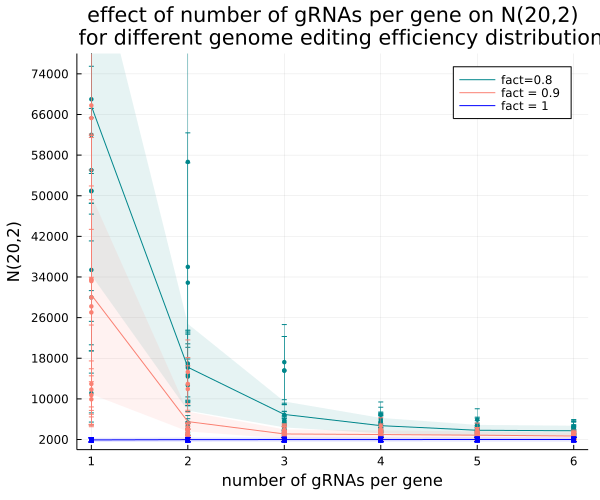

In [15]:
markersize = 2.5; markerstrokewidth=0.4

scatter(1:6, Es_f8_bioccp', errorbar=sds_f8_bioccp', color=:turquoise4, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:turquoise4)
plot!(1:6, mean(Es_f8_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_f8_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (2000:8000:78000, string.(2000:8000:78000)),
    label="fact=0.8",
        ylim=(0,78000),
xlabel="number of gRNAs per gene", ylabel="N(20,2)", title="effect of number of gRNAs per gene on N(20,2)
    for different genome editing efficiency distributions")

scatter!(1:6, Es_f9_bioccp', errorbar=sds_f9_bioccp', color=:salmon, label="", 
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:salmon)
plot!(1:6, mean(Es_f9_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_f9_bioccp, dims=1)[:],  fillalpha=.1, label="fact = 0.9")

scatter!(1:6, Es_f1_bioccp', errorbar=sds_f1_bioccp', color=:blue, label="", 
    markersize=markersize, markerstrokewidth=markerstrokewidth,  markerstrokecolor=:blue ) #, markeralpha=0)
plot!(1:6, mean(Es_f1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_f1_bioccp, dims=1)[:],  fillalpha=.1,
size = ((600,500)),label="fact = 1")